# **Ejercicio 1**

A continuación entrenaremos un algoritmo de regresión lineal, probemos con un conjunto de datos creado aleatoriamente

In [1]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn import metrics
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# Crea un conjunto de datos con una feature
x,y = make_regression(n_samples=500,n_features = 1, noise = 30)

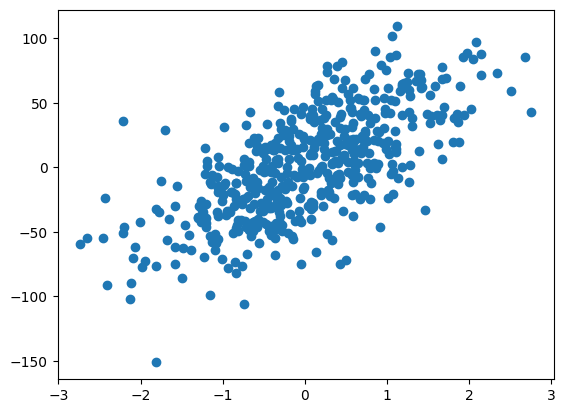

In [3]:
plt.scatter(x,y)

Elegimos ahora el modelo `LinearRegression`

In [4]:
model = LinearRegression()

In [5]:
# Ajuste del modelo a los datos
model.fit(x,y)

LinearRegression()

In [6]:
# Ya estamos listos para predecir
y_pred = model.predict(x)

Con `np.linspace()` creamos números entre un intervalo, por ejemplo

In [7]:
np.linspace(-2,2,4)

array([-2.        , -0.66666667,  0.66666667,  2.        ])

Ahora tomemos dados entre un intervalo para pasarle a nuestro modelo

In [8]:
u = np.linspace(-3,3)

podemos ver que u es un array cuando no se le pasa la cantidad de numeros que quiero tomar, genera por defecto 50

In [9]:
u[0:3]

array([-3.        , -2.87755102, -2.75510204])

Luego con `np.newaxis` aumentamos la dimensionalidad del array ya que los modelos por lo general toman los features bidimensionales

In [10]:
u[0:4,np.newaxis]

array([[-3.        ],
       [-2.87755102],
       [-2.75510204],
       [-2.63265306]])

Le pasamos los datos generados a nuestro modelo para generar la recta que se ajustará a nuestros datos

In [11]:
v = model.predict(u[:,np.newaxis])

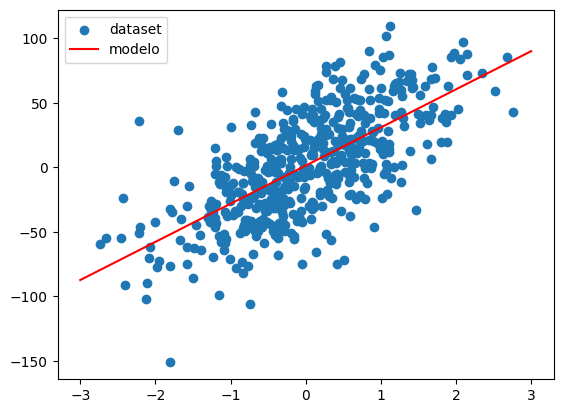

In [12]:
plt.scatter(x,y,label='dataset')
plt.plot(u,v,'r',label='modelo')
plt.legend()

Así pues, hemos entrenado un algoritmo de regresión lineal

# **Ejercicio 2**

## Regresión univariante con un conjunto de datos real

El conjunto de datos `kc_house_data_final.csv` contiene información de los precios de unas casas que dependen de ciertas caracteristicas. Para el problema univariante considere solo la columna `sqft_living`. Predecir cuál es el precio de una casa que tiene `4000 ft`

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [14]:
# Importamos el conjunto de datos
df = pd.read_csv('kc_house_data_final.csv')

In [15]:
# Veamos una muestra
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,year_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,city,year,month,day
0,2014-10-13,221900.0,3,1.00,1180,5650.0,1.0,0,0,3,...,0,98178,47.5112,-122.257,1340,5650,Seattle,2014,10,13
1,2014-12-09,538000.0,3,2.25,2570,7242.0,2.0,0,0,3,...,1991,98125,47.7210,-122.319,1690,7639,Seattle,2014,12,9
2,2015-02-25,180000.0,2,1.00,770,10000.0,1.0,0,0,3,...,0,98028,47.7379,-122.233,2720,8062,Kenmore,2015,2,25
3,2014-12-09,604000.0,4,3.00,1960,5000.0,1.0,0,0,5,...,0,98136,47.5208,-122.393,1360,5000,Seattle,2014,12,9
4,2015-02-18,510000.0,3,2.00,1680,8080.0,1.0,0,0,3,...,0,98074,47.6168,-122.045,1800,7503,Sammamish,2015,2,18


In [16]:
# Mostramos todas las columnas
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_basement',
       'yr_built', 'year_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'city', 'year', 'month', 'day'],
      dtype='object')

In [17]:
# Utilizamos la feature sugerida y la variable objetivo
x=df[['sqft_living']].values
y=df['price'].values

In [18]:
# Dividimos el conjunto de datos
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=13)

In [19]:
# Escalamos nuestra feature con StandardScaler
scaler = StandardScaler()
x_train_f = scaler.fit_transform(x_train)
x_test_f = scaler.fit_transform(x_test)

<ipython-input-20-7629e64ec354>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[:,0])


<Axes: ylabel='Density'>

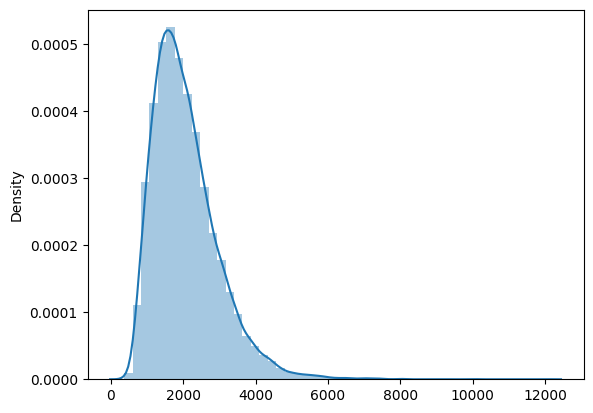

In [20]:
sns.distplot(x_train[:,0])

<ipython-input-21-cc5149cfdf17>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_f[:,0])


<Axes: ylabel='Density'>

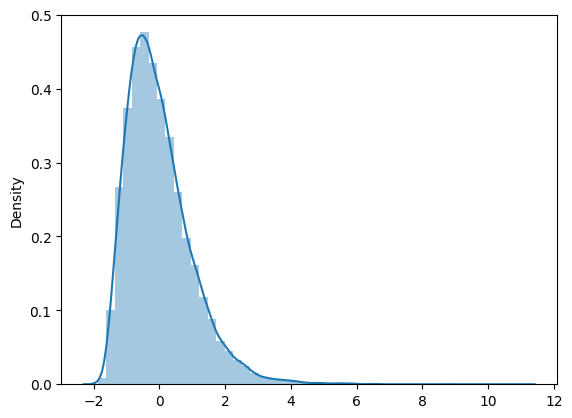

In [21]:
sns.distplot(x_train_f[:,0])

Veamos cómo cambia si estandarizamos con MinMaxScaler

<ipython-input-22-edf88f54e364>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train2[:,0])


<Axes: ylabel='Density'>

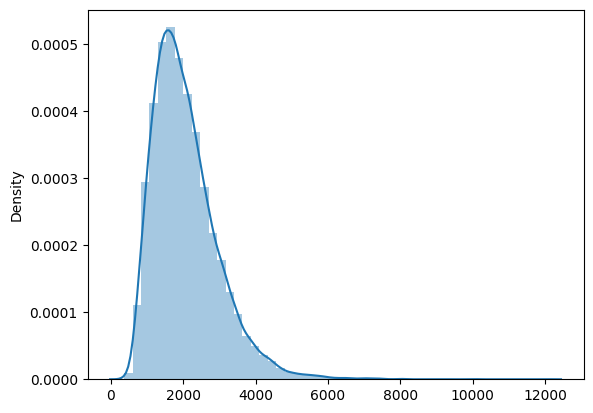

In [22]:
from sklearn.preprocessing import MinMaxScaler
x2=df[['sqft_living']].values
y2=df['price'].values

x_train2, x_test2, y_train2, y_test2 = train_test_split(x2,y2,test_size=0.2,random_state=13)

scaler = MinMaxScaler()
x_train_f2 = scaler.fit_transform(x_train2)
x_test_f2 = scaler.fit_transform(x_test2)
sns.distplot(x_train2[:,0])

<ipython-input-23-c7bbb5fd19ab>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_f2[:,0])


<Axes: ylabel='Density'>

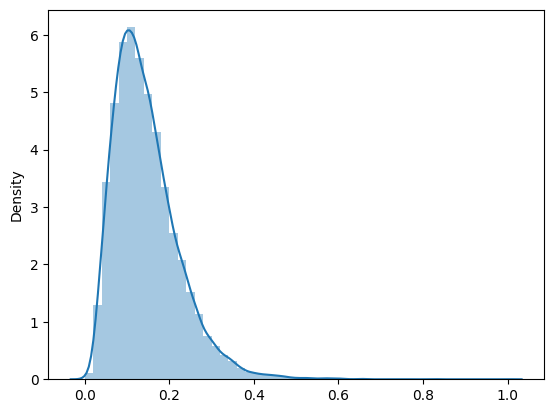

In [23]:
sns.distplot(x_train_f2[:,0])

In [24]:
x_train_f[:,0]

array([ 0.12067388,  0.49524089, -0.09965965, ..., -0.30897651,
        0.23084065, -0.36405989])

In [25]:
x_train_f2[:,0]

array([0.15496575, 0.18407534, 0.13784247, ..., 0.12157534, 0.1635274 ,
       0.11729452])

El resultado parece cambiar, las razones de la estandarización son las siguientes.

## **StandardScaler** (Escalamiento Estándar):

**Objetivo**: El objetivo principal de *StandardScaler* es transformar los datos de manera que tengan una **media** (promedio) igual a **cero** y una **desviación** **estándar** igual a **uno**. Esto se conoce como estandarización.

**Cómo funciona StandardScaler**: calcula la **media** y la **desviación** **estándar** de los datos en cada característica (columna) y luego escala cada valor restando la **media** y dividiendo por la **desviación** **estándar**.

**Cuándo usarlo**: Se utiliza cuando los datos no siguen una distribución normal (gaussiana) y cuando se espera que los algoritmos de machine learning funcionen mejor con datos **estandarizados**, como aquellos que se basan en **distancias** o **gradientes** **(por ejemplo, algoritmos de regresión lineal, SVM, redes neuronales).**


### **MinMaxScaler** (Escalamiento Min-Max):

**Objetivo**: El objetivo principal de **MinMaxScaler** es transformar los datos de manera que estén en un rango específico, generalmente entre 0 y 1. Esto se conoce como normalización.

**Cómo funciona:MinMaxScaler** escala los datos de manera lineal, de modo que el valor **mínimo** de los datos se mapea a **0** y el valor **máximo** se mapea a **1**. Los valores intermedios se escalan proporcionalmente en función de su posición en el rango original.

**Cuándo usarlo**: Se utiliza cuando se requiere que los datos estén en un rango específico y cuando se espera que los algoritmos de machine learning funcionen mejor con datos normalizados, como aquellos que se basan en **pesos** o **probabilidades** **(por ejemplo, algoritmos de k-means, algoritmos de clustering, algoritmos de clasificación como Naive Bayes).**

Una vez entendida la diferencia, entonces continuamos con nuestro ejemplo, como nuestro caso es de regresión lineal, usaremos StandardScaler

In [26]:
modelo = LinearRegression()

In [27]:
modelo.fit(x_train_f,y_train)

LinearRegression()

In [28]:
modelo.score(x_test_f,y_test)

0.5015222896624241

In [29]:
print(f'R2 usando StandardScaler: {modelo.score(x_test_f, y_test):.2f}')


R2 usando StandardScaler: 0.50


Veamos el resultado que obtendriamos de R2 si usaramos MinMaxScaler en lugar de StandardScaler para este problema de regresión

In [33]:
modelo.fit(x_train_f2,y_train2)
print(f'R2 usando MinMaxScaler: {modelo.score(x_test_f2,y_test):.2f}')

R2 usando MinMaxScaler: 0.36


el resultado con StandardScaler no es el más alentador, pero solo estamos usando una caracteristica, y si lo hacemos con MinMaxScaler el resultado está claro que es muy malo

Ahora veamos algunas métricas extra que podemos obtener usando `LinearRegression`, ajustemos nuestro modelo nuevamente con los datos escalados con `StandardScaler`, ya que la última vez lo ajustamos con los datos escalados con `MinMaxScaler`

In [34]:
modelo.fit(x_train_f,y_train)

LinearRegression()

In [35]:
y_pred =  modelo.predict(x_test_f)

r2_linreg = r2_score(y_test, y_pred)
MAE_linreg = mean_absolute_error(y_test, y_pred)
MSE_linreg = mean_squared_error(y_test, y_pred)
RMSE_linreg = np.sqrt(MSE_linreg)

In [36]:
print("")
print(f'MAE :   {MAE_linreg:.2f}')
print(f'MSE :   {MSE_linreg:.2f}')
print(f"RMSE:   {RMSE_linreg:.2f}")
print(f"R2  :   {r2_linreg:.2f}")


MAE :   171129.00
MSE :   64846168438.60
RMSE:   254649.11
R2  :   0.50


Ahora estamos listos para responder la pregunta inicial

In [37]:
una_casa_particular=np.array([[4000]])

In [38]:
una_casa_particular_escalada=scaler.transform(una_casa_particular)

In [39]:
modelo.predict(una_casa_particular_escalada)

array([636923.67482071])

Veamos los parámetros de la regresión

In [40]:
print('Intercept: {}'.format(modelo.intercept_))
print('Coefficients: {}'.format(modelo.coef_))

Intercept: 537325.3387892507
Coefficients: [256070.37369648]


Ahora podemos graficar nuestra recta

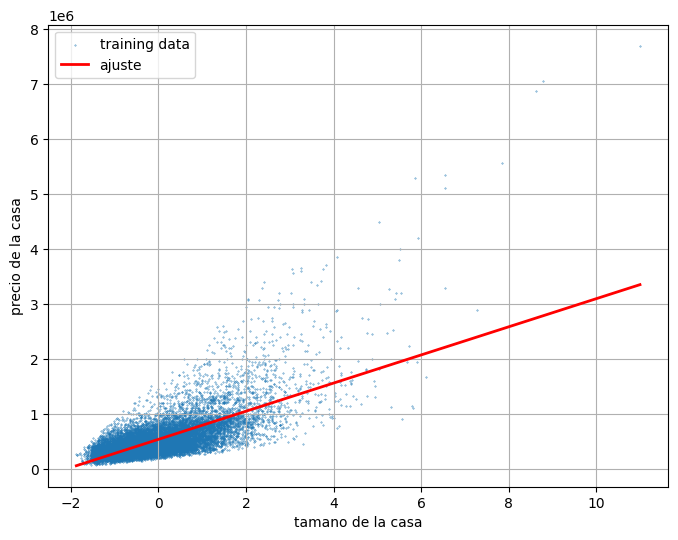

In [41]:
fig,ax=plt.subplots(1,1,figsize=(8,6))


x_new=np.linspace(np.min(x_train_f),np.max(x_train_f),100)
y_new=modelo.intercept_ + x_new* modelo.coef_[0]

ax.scatter(x_train_f,y_train, label='training data',s=0.1)
ax.plot(x_new,y_new,'-r', label='ajuste',lw=2)
ax.set_xlabel('tamano de la casa')
ax.set_ylabel('precio de la casa')
ax.grid(True)
ax.legend()

Obtengamos las predicciones para guardarlas en el `DataFrame` y comparar con el test

In [44]:
predicciones=pd.DataFrame(data=x_test,columns=['sqft_livin'])

In [45]:
predicciones['y_test']=y_test

In [46]:
y_pred_formateado = [f'{numero:.{2}f}' for numero in y_pred]
predicciones['y_pred']=y_pred_formateado

In [47]:
predicciones.head()

,sqft_livin,y_test,y_pred
0,3250,689000.0,860040.58
1,3350,1200000.0,887944.07
2,4180,1040890.0,1119543.02
3,1940,450000.0,494504.88
4,980,452000.0,226631.40


Podemos ver cómo es la dispersión entre los valores que hemos predecido con los valores de test. Si estos se ajustaran perfectamente entonces hemos caido en overfitting lo cual es malo y no sería un entrenamiento confiable

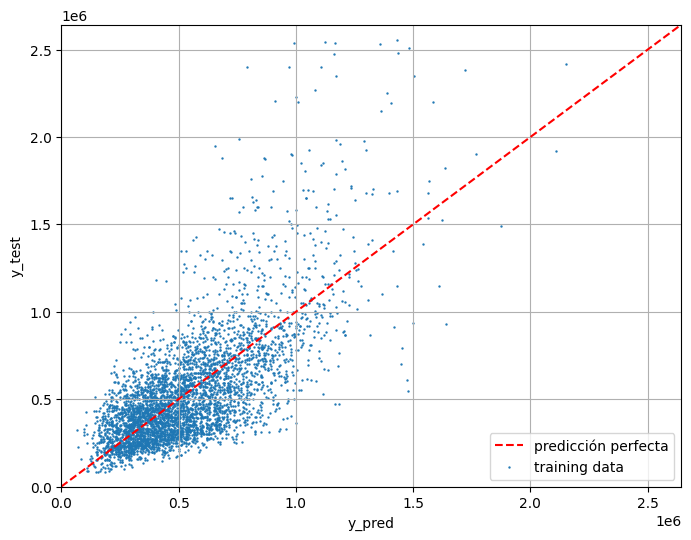

In [49]:
fig,ax=plt.subplots(1,1,figsize=(8,6))

x_ref=np.linspace(0,np.max(y_pred),100)
y_ref=np.linspace(0,np.max(y_pred),100)
ax.plot(x_ref,y_ref,'--r' ,label='predicción perfecta')

ax.scatter(y_pred,y_test, label='training data',s=0.5)

ax.set_xlabel('y_pred')
ax.set_ylabel('y_test')
ax.set_xlim(0,np.max(y_pred))
ax.set_ylim(0,np.max(y_pred))
ax.grid(True)
ax.legend()

# **Ejercicio 3**

### Regresión multivariante

Ahora mejore el problema anterior para obtener una mejor predicción, use las features que considere más relevantes para el problema

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [51]:
df = pd.read_csv('kc_house_data_final.csv')

Creemos una matriz de correlación y demos un formato de mapa de color

<ipython-input-52-f70c71bc024f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion = df.corr()


<Axes: >

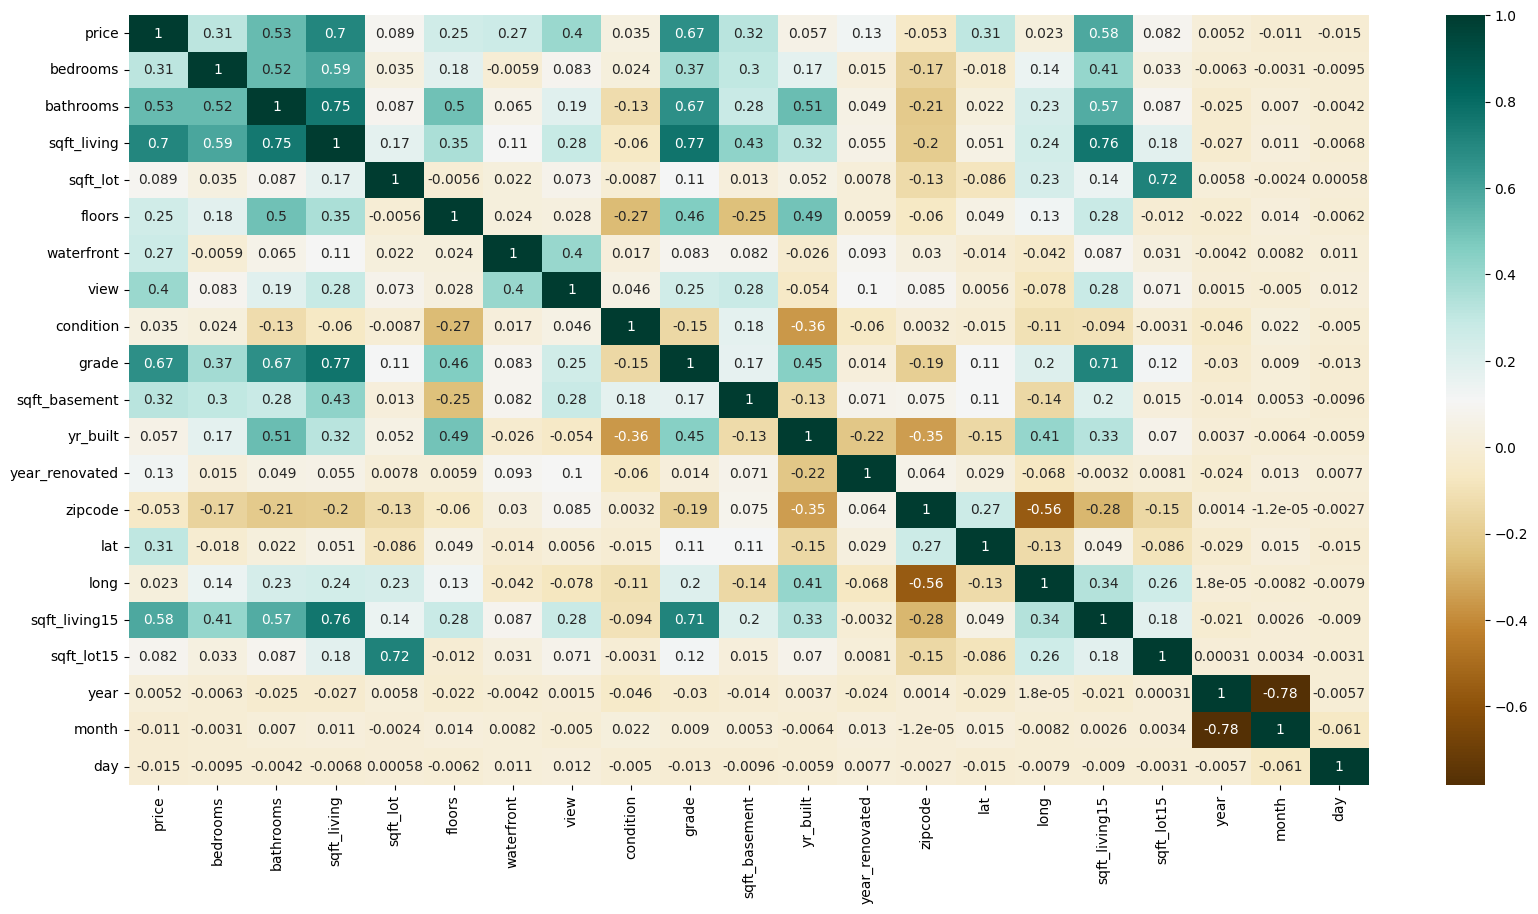

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
correlacion = df.corr()
sns.heatmap(correlacion,cmap='BrBG',annot=True)

In [53]:
x=df[['bedrooms',
        'bathrooms',
        'sqft_living',
        'sqft_lot',
        'floors',
        'waterfront',
        'view',
        'condition',
        'grade',
        'sqft_basement',
        'yr_built',
        'year_renovated',
        'zipcode',
        'lat',
        'long',
        'sqft_living15',
        'sqft_lot15',
        'year',
        'month',
        'day'
]].values
y = df['price'].values

In [54]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1275)

In [55]:
scaler=StandardScaler()
x_train_f = scaler.fit_transform(x_train)
x_test_f = scaler.fit_transform(x_test)


In [56]:
modelo=LinearRegression()
modelo.fit(x_train_f,y_train)

LinearRegression()

In [57]:
y_pred = modelo.predict(x_test_f)

In [58]:
r2_linreg = r2_score(y_test, y_pred)
MAE_linreg = mean_absolute_error(y_test, y_pred)
MSE_linreg = mean_squared_error(y_test, y_pred)
RMSE_linreg = np.sqrt(MSE_linreg)

In [59]:
print("")
print(f'MAE :   {MAE_linreg:.2f}')
print(f'MSE :   {MSE_linreg:.2f}')
print(f"RMSE:   {RMSE_linreg:.2f}")
print(f"R2  :   {r2_linreg:.2f}")


MAE :   121180.69
MSE :   34301918750.16
RMSE:   185207.77
R2  :   0.74


Vemos cómo ha mejorado el coeficiente `R2` de `0.50` a `0.74`

Ya no es intuitivo graficar las features con la variable objetivo, dato que tenemos muchas dimensiones. Sin embargo podemos aún observar cómo se estpa comportando `y_test` con `y_pred`

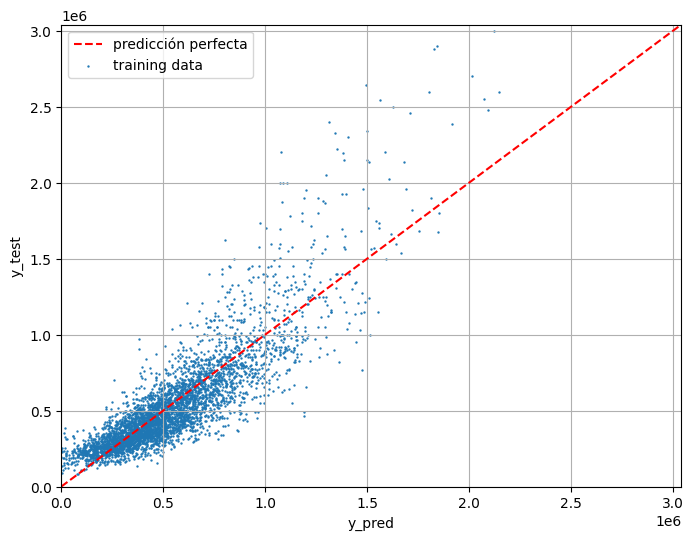

In [60]:
fig,ax=plt.subplots(1,1,figsize=(8,6))

x_ref=np.linspace(0,np.max(y_pred),100)
y_ref=np.linspace(0,np.max(y_pred),100)
ax.plot(x_ref,y_ref,'--r' ,label='predicción perfecta')

ax.scatter(y_pred,y_test, label='training data',s=0.5)

ax.set_xlabel('y_pred')
ax.set_ylabel('y_test')
ax.set_xlim(0,np.max(y_pred))
ax.set_ylim(0,np.max(y_pred))
ax.grid(True)
ax.legend()